## Apple Stock Price Prediction

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

## Exploring Data

In [3]:
apple_df = pd.read_csv('/kaggle/input/apple-inc-aapl-stock-data-1980-2024/aapl_us_d.csv')

In [4]:
apple_df.head(5)

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [6]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(apple_df)


Shape
(10080, 6)

Types
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

NANs
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB
None


## Preprocessing

In [8]:
#converting the dataype of 'Date' col to 'datetime'
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df['Date'].head(5)

0   1984-09-07
1   1984-09-10
2   1984-09-11
3   1984-09-12
4   1984-09-13
Name: Date, dtype: datetime64[ns]

In [9]:
#making the 'Date' col as index
apple_df.set_index('Date', inplace = True)

In [10]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10080 entries, 1984-09-07 to 2024-09-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10080 non-null  float64
 1   High    10080 non-null  float64
 2   Low     10080 non-null  float64
 3   Close   10080 non-null  float64
 4   Volume  10080 non-null  float64
dtypes: float64(5)
memory usage: 472.5 KB


In [11]:
#sort the indexes
apple_df.sort_index(inplace = True)

In [12]:
apple_df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [13]:
# Apply log transformation to Volume to stabilize variance
apple_df['Log_Volume'] = np.log(apple_df['Volume'])

In [14]:
#deleting the original column of volume
apple_df.drop(columns = ['Volume'], inplace = True)

In [15]:
apple_df.head()

,Open,High,Low,Close,Log_Volume
Date,,,,,
1984-09-07,0.100763,0.101999,0.099546,0.100763,18.397167
1984-09-10,0.100763,0.101071,0.098340,0.100165,18.143774
1984-09-11,0.101071,0.103814,0.101071,0.101999,19.001613
1984-09-12,0.101999,0.102597,0.098928,0.098928,18.866464
1984-09-13,0.104432,0.104730,0.104432,0.104432,19.309522


In [16]:
#normalizing the data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(apple_df[apple_df.columns])

In [17]:
scaled_values

array([[1.91824379e-04, 1.93865279e-04, 1.92003614e-04, 1.95770926e-04,
        4.41383007e-01],
       [1.91824379e-04, 1.89952540e-04, 1.86827143e-04, 1.93223700e-04,
        4.09858777e-01],
       [1.93127120e-04, 2.01517889e-04, 1.98545973e-04, 2.01035761e-04,
        5.16581382e-01],
       ...,
       [9.37316165e-01, 9.34857947e-01, 9.33014411e-01, 9.40493735e-01,
        3.41718576e-01],
       [9.37168126e-01, 9.50458309e-01, 9.50350848e-01, 9.47010885e-01,
        3.19314783e-01],
       [9.47002128e-01, 9.49446394e-01, 9.42841252e-01, 9.40536331e-01,
        3.53954062e-01]])

In [18]:
#converting the array into dataframe
apple_scaled_df = pd.DataFrame(scaled_values, columns = apple_df.columns, index = apple_df.index)

In [20]:
apple_scaled_df.head(5)

,Open,High,Low,Close,Log_Volume
Date,,,,,
1984-09-07,0.000192,0.000194,0.000192,0.000196,0.441383
1984-09-10,0.000192,0.000190,0.000187,0.000193,0.409859
1984-09-11,0.000193,0.000202,0.000199,0.000201,0.516581
1984-09-12,0.000197,0.000196,0.000189,0.000188,0.499768
1984-09-13,0.000207,0.000205,0.000213,0.000211,0.554888


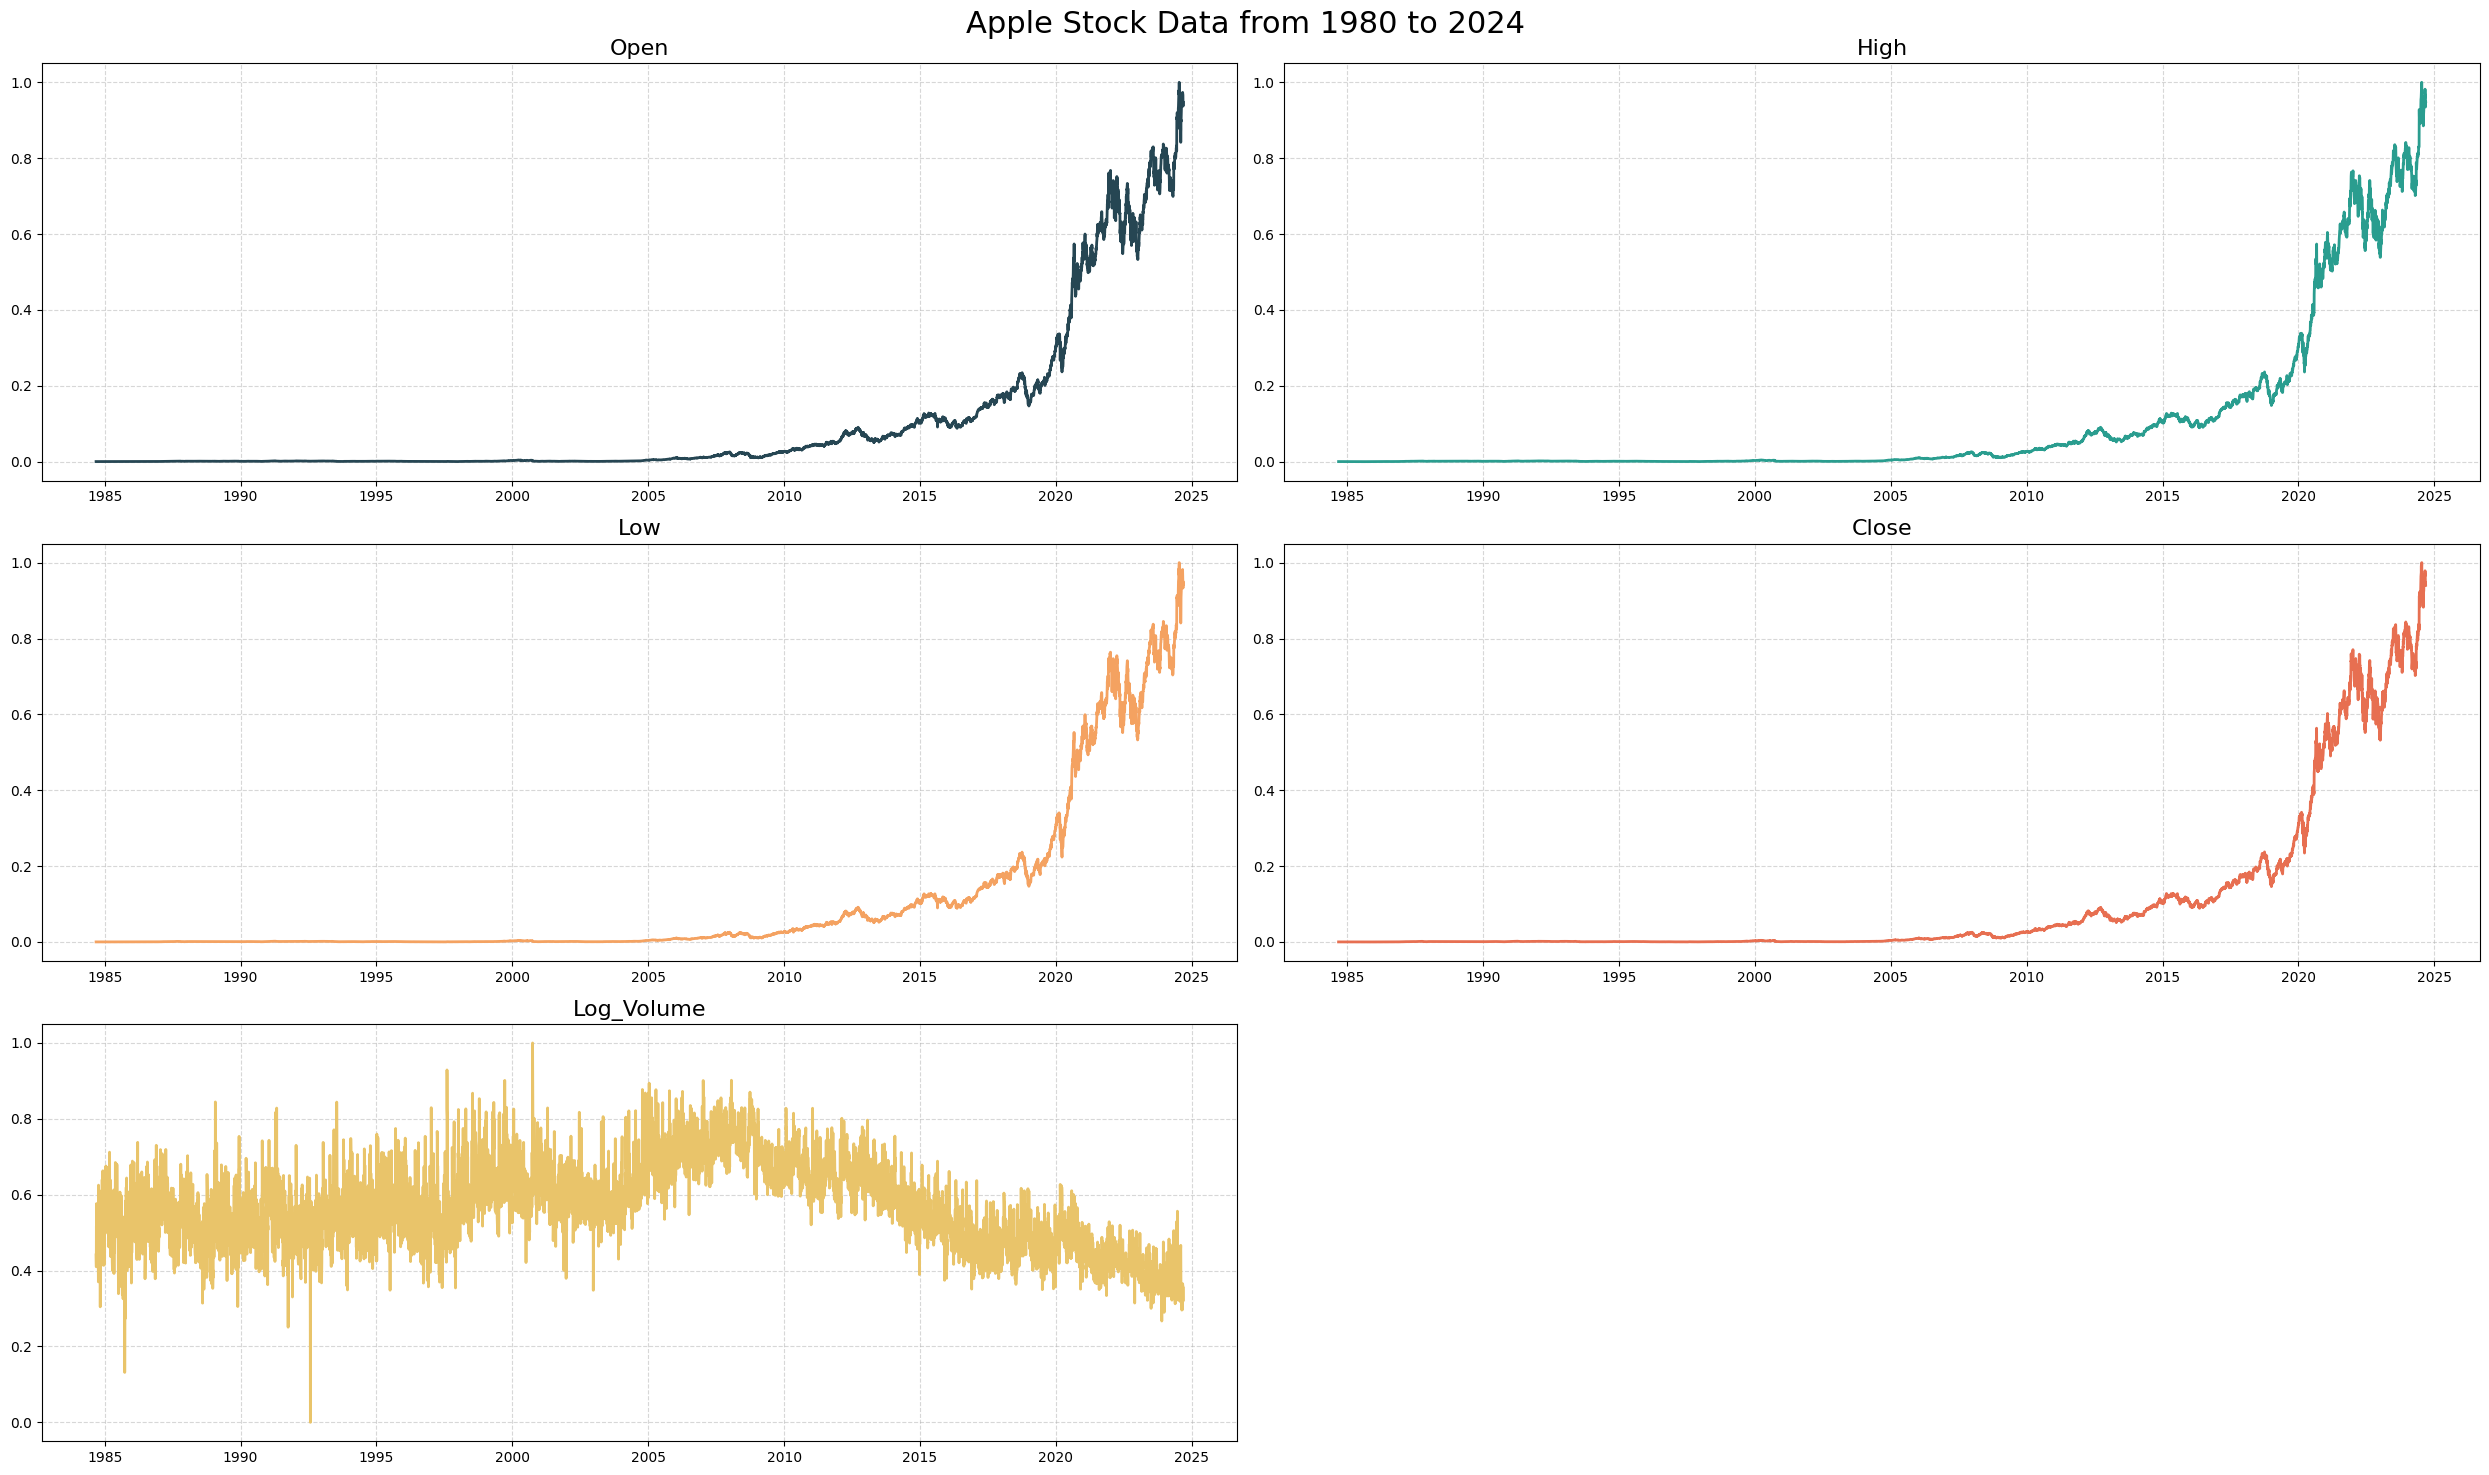

In [26]:
# Define colors
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a']

# Create a figure and axis object
plt.figure(figsize=(25, 15))

# Plot each variable
for i, column in enumerate(apple_scaled_df.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(apple_scaled_df.index, apple_scaled_df[column], color=colors[i], linewidth=2)
    plt.title(column, fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots
plt.delaxes(plt.axes([0.55, 0.1, 0.4, 0.2]))

# Set title
plt.suptitle('Apple Stock Data from 1980 to 2024', fontsize=22, y=0.98)

# Layout so plots do not overlap
plt.tight_layout()

# Show plot
plt.show()

In [28]:
# model will consider the past 60 data points to make a prediction
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)

In [29]:
X.shape, y.shape

((10020, 60, 5), (10020, 5))

In [30]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8016, 60, 5), (8016, 5), (2004, 60, 5), (2004, 5))

## Defining Model

In [33]:
model = keras.Sequential([
    # Adding the first LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Adding the second LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Adding the third LSTM layer with Dropout
    keras.layers.LSTM(units = 50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Adding a Dense output layer
    keras.layers.Dense(y_train.shape[1])
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [35]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - RootMeanSquaredError: 0.0847 - loss: 0.0079 - val_RootMeanSquaredError: 0.0413 - val_loss: 0.0017
Epoch 2/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0488 - loss: 0.0024 - val_RootMeanSquaredError: 0.0370 - val_loss: 0.0014
Epoch 3/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0463 - loss: 0.0022 - val_RootMeanSquaredError: 0.0497 - val_loss: 0.0025
Epoch 4/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0411 - loss: 0.0017 - val_RootMeanSquaredError: 0.0312 - val_loss: 9.7158e-04
Epoch 5/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0401 - loss: 0.0016 - val_RootMeanSquaredError: 0.0253 - val_loss: 6.4011e-04
Epoch 6/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - RootMeanSquaredError: 0.0393 - loss: 0.0015 - val_RootMeanSquaredError: 0.0263 - val_loss: 6.9073e-04
Epoch 7/100
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 22s

In [37]:
# Making predictions on the test data
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [38]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

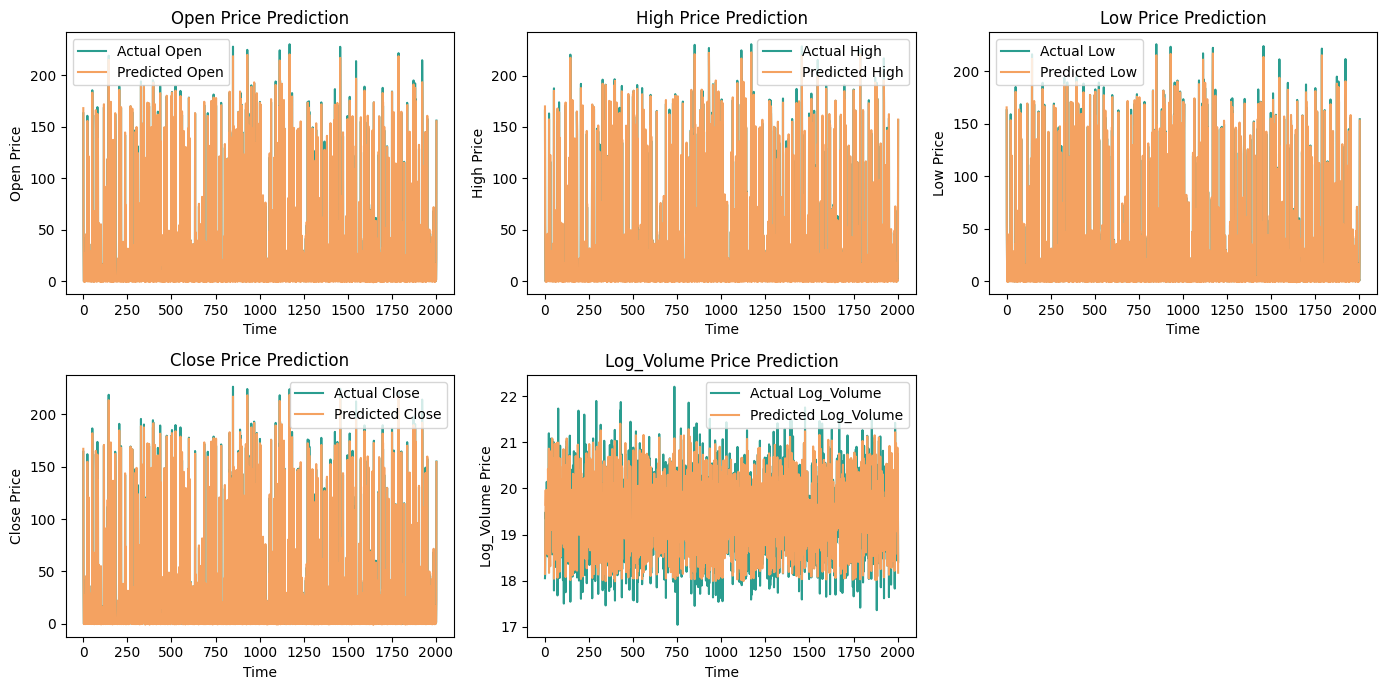

In [50]:
# Plotting the results
plt.figure(figsize=(14, 7))

for i, col in enumerate(apple_scaled_df.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='#2a9d8f', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='#f4a261', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()

plt.tight_layout()
plt.show()

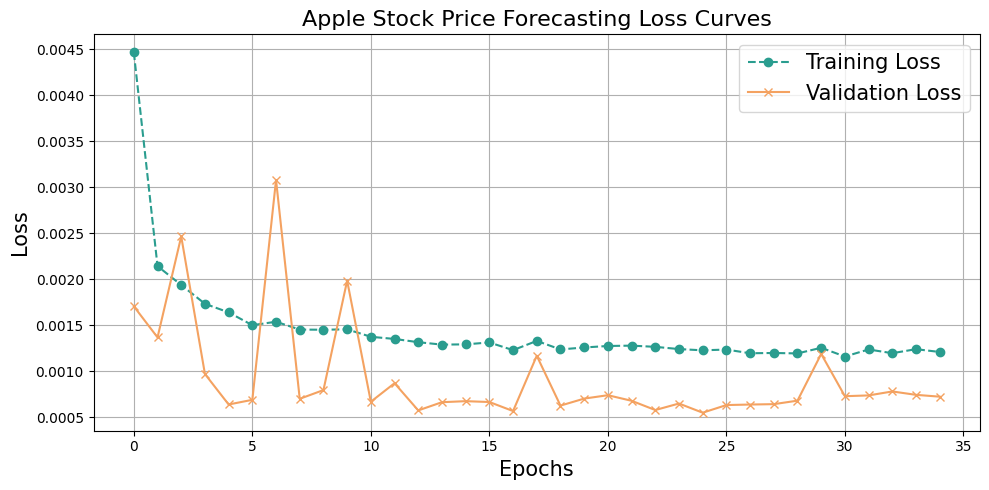

In [45]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))

    # Loss curve
    plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')
    
    plt.title('Apple Stock Price Forecasting Loss Curves', fontsize=16)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)